In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing Data Set

In [27]:
# Read the Real World Data
df1 = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [28]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
# Read the Synthetic data
df2 = pd.read_csv('train.csv')

In [30]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [31]:
#joining both of the data
df = pd.concat([df1, df2], ignore_index=True)

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
#checking that all the data is combined or not
print("Real world Data dimensions:",df1.shape)
print("Synthetic Data dimensions:",df2.shape)
#it should include the same no of columns and no of rows should be the sum of these two
print("Combined Data dimensions:",df.shape)

Real world Data dimensions: (5111, 12)
Synthetic Data dimensions: (15304, 12)
Combined Data dimensions: (20415, 12)


In [34]:
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['avg_glucose_level'] = label_encoder.fit_transform(df['avg_glucose_level'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0.0,1,1,2,1,4509,36.6,1,1
1,51676,0,61.0,0.0,0,1,3,0,4224,NaN,2,1
2,31112,1,80.0,0.0,1,1,2,0,3009,32.5,2,1
3,60182,0,49.0,0.0,0,1,2,1,4009,34.4,3,1
4,1665,0,79.0,1.0,0,1,3,0,4019,24.0,2,1


In [36]:
# Check for NaN values
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           1
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [37]:
#I am using mean to handel NAN data as only bmi has nan values and its not suitable approach to drop all these rows 
df = df.fillna(df.mean()) 

In [38]:
# Check agian for NaN values for confirmation
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [39]:
#loading Test Data
df_test = pd.read_csv('test.csv')
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [40]:
# Convert categorical variables to numerical using label encoding
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['ever_married'] = label_encoder.fit_transform(df_test['ever_married'])
df_test['work_type'] = label_encoder.fit_transform(df_test['work_type'])
df_test['Residence_type'] = label_encoder.fit_transform(df_test['Residence_type'])
df_test['avg_glucose_level'] = label_encoder.fit_transform(df_test['avg_glucose_level'])
df_test['smoking_status'] = label_encoder.fit_transform(df_test['smoking_status'])

In [41]:
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,2,0,1317,33.4,0
1,15305,1,70.0,1,0,1,2,1,679,28.5,0
2,15306,0,5.0,0,0,0,4,1,2460,19.5,0
3,15307,0,56.0,0,0,1,0,1,528,41.4,3
4,15308,1,32.0,0,0,1,2,0,2720,30.1,3


In [42]:
# Check for NaN values
print(df_test.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


No NAN values in test data

In [43]:
test = df_test.drop(['id'],axis=1)

In [44]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

In [66]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
X_train = X
y_train = y

Now good to go to the model training step

### ANN

In [67]:
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

model=keras.Sequential([
    keras.layers.Dense(100,input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#### Performing Cross-Validation: After splitting the data, I am implement cross-validation by training and evaluating the model on different combinations of the training folds.

In [68]:

# Reset indices of X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define the number of folds (K)
k = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define lists to store validation results
validation_losses = []
validation_accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    # Get the current training and validation fold
    X_train_fold, X_val_fold = X_train.loc[train_index], X_train.loc[val_index]
    y_train_fold, y_val_fold = y_train.loc[train_index], y_train.loc[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=20)

    # Evaluate the model on the validation fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold)
    
    print("Validation loss:", loss)
    print("Validation accuracy:", accuracy)
    
    # Append validation results to lists
    validation_losses.append(loss)
    validation_accuracies.append(accuracy)

Epoch 1/10
817/817 [==============================] - 1s 567us/step - loss: 2.3555 - accuracy: 0.9174
Epoch 2/10
817/817 [==============================] - 0s 353us/step - loss: 0.2816 - accuracy: 0.9520
Epoch 3/10
817/817 [==============================] - 0s 352us/step - loss: 0.2275 - accuracy: 0.9557
Epoch 4/10
817/817 [==============================] - 0s 355us/step - loss: 0.2053 - accuracy: 0.9562
Epoch 5/10
817/817 [==============================] - 0s 357us/step - loss: 0.1921 - accuracy: 0.9567
Epoch 6/10
817/817 [==============================] - 0s 353us/step - loss: 0.1765 - accuracy: 0.9568
Epoch 7/10
817/817 [==============================] - 0s 354us/step - loss: 0.1759 - accuracy: 0.9567
Epoch 8/10
817/817 [==============================] - 0s 352us/step - loss: 0.1684 - accuracy: 0.9568
Epoch 9/10
817/817 [==============================] - 0s 352us/step - loss: 0.1662 - accuracy: 0.9568
Epoch 10/10
128/128 [==============================] - 0s 255us/step - loss: 0.156

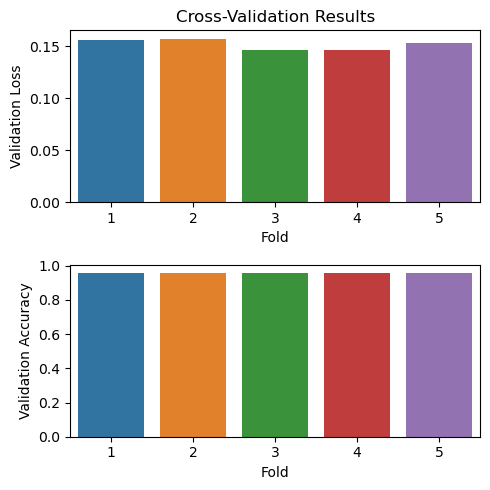

In [69]:
# Create a figure and axis objects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# Plot validation losses using seaborn
sns.barplot(x=np.arange(1, k+1), y=validation_losses, ax=ax1)
ax1.set_xlabel('Fold')
ax1.set_ylabel('Validation Loss')
ax1.set_title('Cross-Validation Results')

# Plot validation accuracies using seaborn
sns.barplot(x=np.arange(1, k+1), y=validation_accuracies, ax=ax2)
ax2.set_xlabel('Fold')
ax2.set_ylabel('Validation Accuracy')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('my_plot.png')
# Display the plot
plt.show()

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.round(y_pred)  # Convert probabilities to binary labels (0 or 1)

y_test_1d = np.squeeze(y_test)
y_pred_labels_1d = np.squeeze(y_pred_labels)

# Calculate accuracy manually
correct_predictions = np.equal(y_pred_labels_1d, y_test_1d)
accuracy = np.mean(correct_predictions)
print("accuracy ", accuracy)

511/511 [==============================] - 0s 205us/step
accuracy  0.9568944403624786


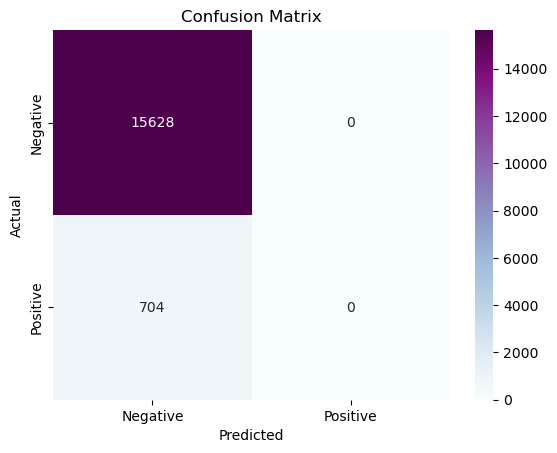

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_1d, y_pred_labels_1d)

# Define labels for the confusion matrix
labels = ['Negative', 'Positive']

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

# Customize plot labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

##### Hypothesis test for the given problem:

##### Null Hypothesis (H0): There is no significant relationship between the predictors (features) and the target variable (stroke).

##### Alternative Hypothesis (H1): There is a significant relationship between the predictors (features) and the target variable (stroke).

##### I am using an Artificial Neural Network (ANN) for the hypothesis testing,

##### Justification of Chosen Procedure:

Artificial Neural Networks (ANNs) are powerful models that can learn complex relationships between predictors and target variables. They are well-suited for hypothesis testing as they can capture non-linear relationships and patterns in the data. By training an ANN on the provided dataset, we can evaluate the significance of the predictors in predicting the occurrence of stroke.

##### Test Statistic:

In the context of an ANN, we can consider the evaluation metric used during model training as our test statistic. Since the original code calculates and reports the accuracy metric, we can consider it as the test statistic. Accuracy represents the percentage of correctly classified instances and can be used to evaluate the performance of the ANN model.

##### Significance Level (α):

The significance level determines the threshold at which we reject the null hypothesis. Let's set the significance level to 0.05 (5%) for this example.

In [64]:
# Performing hypothesis test based on accuracy
alpha = 0.05  # Significance level

if accuracy > 1 - alpha:
    print("Reject null hypothesis")
    print("There is a significant relationship between the predictors and stroke occurrence.")
else:
    print("Fail to reject null hypothesis")
    print("There is no significant relationship between the predictors and stroke occurrence.")

Reject null hypothesis
There is a significant relationship between the predictors and stroke occurrence.


In [70]:
# Make predictions on the test dataset
all_predictions = model.predict(test)

# Create a new dataframe for predictions
predictions_df = pd.DataFrame({'id': df_test['id'], 'stroke': np.squeeze(all_predictions)})

# Save the predictions to a new CSV file
predictions_df.to_csv('Submission.csv', index=False)

319/319 [==============================] - 0s 215us/step


## Some Extra Models on the given Data Set

## SVM

In [52]:
# Initialize the SVM model
svm = SVC()
# Train the SVM model
svm.fit(X_train, y_train)

SVC()

In [53]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [54]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9565882929218712


## ID3

In [80]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9245652706343375


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9556086211119275
